# Canary 
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [ ]:
!./get_logs.sh 172.18.5.120 300000
!./parse_logs.sh
!ls ../data/

In [4]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 5.68000000e+02, 2.74000000e+02, ...,
        1.07000000e-01, 3.00000000e+00, 9.00000000e+00],
       [2.01812112e+13, 5.81000000e+02, 3.02000000e+02, ...,
        1.35000000e-01, 3.00000000e+00, 4.00000000e+00],
       [2.01812112e+13, 5.22000000e+02, 1.98000000e+02, ...,
        6.85000000e-02, 3.00000000e+00, 3.00000000e+00],
       ...,
       [2.01812112e+13, 4.07000000e+02, 2.07000000e+02, ...,
        8.64000000e-02, 2.00000000e+00, 8.00000000e+00],
       [2.01812112e+13, 4.25000000e+02, 2.38000000e+02, ...,
        7.82000000e-02, 2.00000000e+00, 8.00000000e+00],
       [2.01812112e+13, 4.04000000e+02, 2.17000000e+02, ...,
        1.30300000e-01, 3.00000000e+00, 1.00000000e+01]])

In [5]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(488.849907063197, 75.86372700006773)

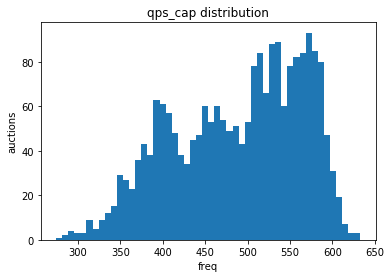

In [6]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(205.6003717472119, 81.97624191056833)

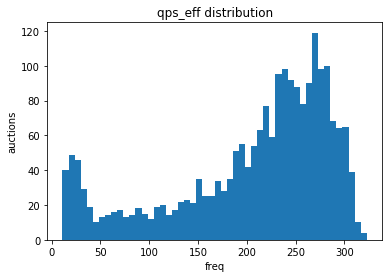

In [7]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(0.0020992100371747214, 0.0003627834471007921)

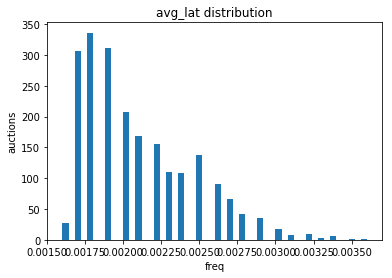

In [8]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(7.269981412639405, 2.986193508886684)

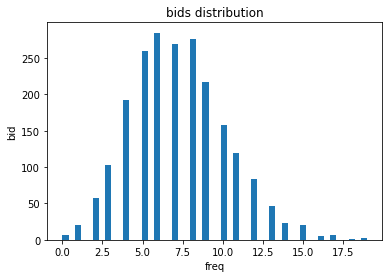

In [9]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),math.sqrt(fn.var())

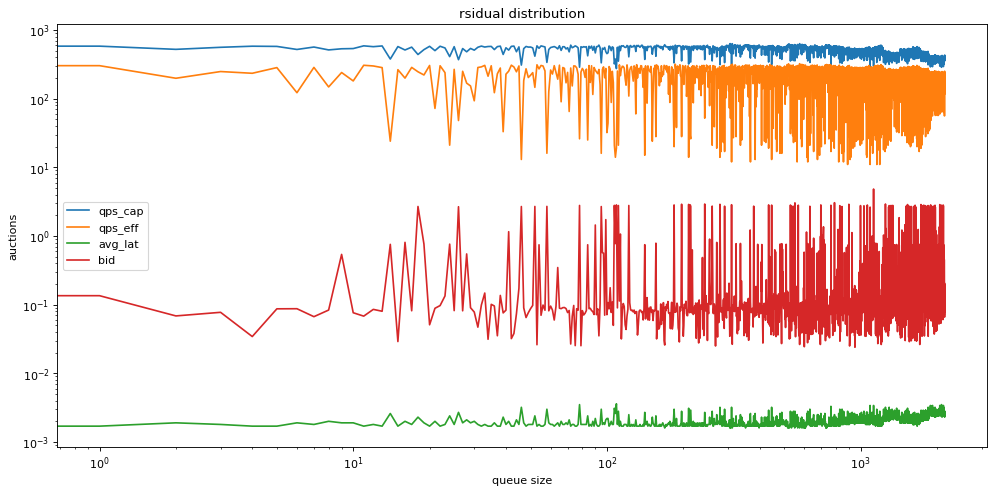

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()